In [1]:
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [2]:
paDict = {"DH":100, "C":100, "1B":100, "2B":100, "3B":100, "SS":100, "LF":100, "CF":100, "RF":100}
hitDict = {"DH":29, "C":22, "1B":32, "2B":33, "3B":27, "SS":23, "LF":25, "CF":24, "RF":29}
doubleDict = {"DH":6, "C":2, "1B":6, "2B":3, "3B":4, "SS":1, "LF":3, "CF":2, "RF":6}
tripleDict = {"DH":0, "C":0, "1B":0, "2B":1, "3B":1, "SS":1, "LF":1, "CF":1, "RF":1}
homerDict = {"DH":7, "C":4, "1B":5, "2B":0, "3B":2, "SS":1, "LF":3, "CF":2, "RF":4}
walkDict = {"DH":7, "C":5, "1B":7, "2B":1, "3B":10, "SS":6, "LF":6, "CF":5, "RF":5}
hbpDict = {"DH":1, "C":2, "1B":1, "2B":1, "3B":2, "SS":1, "LF":2, "CF":2, "RF":1}

In [3]:
lineup = ["C","1B","2B","3B","SS","LF","CF","RF","DH"]

In [4]:
def getSlash(lineup):
    for batter in lineup:
        PA = paDict[batter]
        Hits = hitDict[batter]
        Doubles = doubleDict[batter]
        Triples = tripleDict[batter]
        Homers = homerDict[batter]
        Walks = walkDict[batter]
        HBP = hbpDict[batter]
        Singles = Hits - Doubles - Triples - Homers
        avg = round(Hits / (PA - Walks - HBP),3)
        obp = round((Hits + Walks + HBP) / PA,3)
        slg = round((Singles + 2*Doubles + 3*Triples + 4*Homers) / (PA - Walks - HBP),3)
        print(str(batter) + ": " + str(avg) + "/" + str(obp) + "/" + str(slg))

In [5]:
def getProbs(batter):
    PA = paDict[batter]
    Hits = hitDict[batter]
    Doubles = doubleDict[batter]
    Triples = tripleDict[batter]
    Homers = homerDict[batter]
    Walks = walkDict[batter]
    HBP = hbpDict[batter]
    Singles = Hits - Doubles - Triples - Homers
    singleProb = float(Singles)/PA
    doubleProb = float(Doubles)/PA
    tripleProb = float(Triples)/PA
    homerProb = float(Homers)/PA
    walkProb = float(Walks)/PA
    hbpProb = float(HBP)/PA
    outProb = 1.0 - singleProb - doubleProb - tripleProb - homerProb - walkProb - hbpProb
    return singleProb, doubleProb, tripleProb, homerProb, walkProb, hbpProb, outProb

In [6]:
def getOutcome(batter):
    #use batter probabilities to get outcome:
    #1B,2B,3B,HR,BB,HBP,OUT
    #later add SF,GDP,SB,RBI Groundout, etc.
    (single,double,triple,homer,walk,hbp,out) = getProbs(batter)
    double = single + double
    triple = double + triple
    homer = triple + homer
    walk = homer + walk
    hbp = walk + hbp
    out = hbp + out
    r = random.uniform(0,1)
    if r <= single:
        outcome = "1B"
    else:
        if r <= double:
            outcome = "2B"
        else:
            if r <= triple:
                outcome = "3B"
            else:
                if r <= homer:
                    outcome = "HR"
                else:
                    if r <= walk:
                        outcome = "BB"
                    else:
                        if r <= hbp:
                            outcome = "HBP"
                        else:
                            outcome = "OUT"

    #print (batter,outcome)
    return outcome

In [7]:
def AtBat(batter,runners):
    outcome = getOutcome(batter)
    if outcome == "1B":
        if runners == 0:
            return (0,0,1)
        elif runners == 1:
            return (0,0,4)
        elif runners == 2:
            return (0,0,5)
        elif runners == 3:
            return (1,0,1)
        elif runners == 4:
            return (0,0,7)
        elif runners == 5:
            return (1,0,4)
        elif runners == 6:
            return (1,0,5)
        else:
            return (1,0,7)
    elif outcome == "2B":
        if runners == 0:
            return (0,0,2)
        elif runners == 1:
            return (0,0,6)
        elif runners == 2:
            return (1,0,2)
        elif runners == 3:
            return (1,0,2)
        elif runners == 4:
            return (1,0,6)
        elif runners == 5:
            return (1,0,6)
        elif runners == 6:
            return (2,0,2)
        else:
            return (2,0,6)
    elif outcome == "3B":
        if runners == 0:
            return (0,0,3)
        elif runners == 1:
            return (1,0,3)
        elif runners == 2:
            return (1,0,3)
        elif runners == 3:
            return (1,0,3)
        elif runners == 4:
            return (2,0,3)
        elif runners == 5:
            return (2,0,3)
        elif runners == 6:
            return (2,0,3)
        else:
            return (3,0,3)
    elif outcome == "HR":
        if runners == 0:
            return (1,0,0)
        elif runners == 1:
            return (2,0,0)
        elif runners == 2:
            return (2,0,0)
        elif runners == 3:
            return (2,0,0)
        elif runners == 4:
            return (3,0,0)
        elif runners == 5:
            return (3,0,0)
        elif runners == 6:
            return (3,0,0)
        else:
            return (4,0,0)
    elif outcome == "BB" or outcome == "HBP":
        if runners == 0:
            return (0,0,1)
        elif runners == 1:
            return (0,0,4)
        elif runners == 2:
            return (0,0,4)
        elif runners == 3:
            return (0,0,5)
        elif runners == 4:
            return (0,0,7)
        elif runners == 5:
            return (0,0,7)
        elif runners == 6:
            return (0,0,7)
        else:
            return (1,0,7)
    else:
        return (0,1,runners)

In [8]:
def SimGame(lineup):
    i = 0
    runs = 0
    outs = 0
    runners = 0
    inning = 1
    while inning <= 9:
        outs = 0
        runners = 0
        while outs < 3:
            batter = lineup[i]
            # takes in batter, runners on base
            # returns runs scored, outs recorded on play, ending baserunners
            (add_runs,add_outs,runners) = AtBat(batter,runners)
            if i == 8:
                i = 0
            else:
                i += 1
            runs += add_runs
            outs += add_outs
        #print("End inning ",inning,runs,"runs")
        inning += 1
    #print (runs)
    return runs

In [9]:
def SimGames(lineup,n):
    run_list = []
    for i in range(0,n):
        run_list.append(SimGame(lineup))
    return run_list

In [10]:
getSlash(lineup)

C: 0.237/0.29/0.387
1B: 0.348/0.4/0.576
2B: 0.337/0.35/0.388
3B: 0.307/0.39/0.443
SS: 0.247/0.3/0.312
LF: 0.272/0.33/0.424
CF: 0.258/0.31/0.366
RF: 0.309/0.35/0.521
DH: 0.315/0.37/0.609


In [11]:
lineup_modern = ["3B","1B","DH","RF","2B","LF","CF","C","SS"]
lineup_traditional = ["3B","2B","1B","DH","RF","LF","CF","C","SS"]
lineup_bad = ["C","SS","CF","LF","2B","RF","3B","DH","1B"]

In [12]:
run_list_modern = SimGames(lineup_modern, 100000)
run_list_traditional = SimGames(lineup_traditional, 100000)
run_list_bad = SimGames(lineup_bad, 100000)

In [13]:
np.mean(run_list_modern)

4.27945

In [14]:
np.mean(run_list_traditional)

4.28276

In [15]:
np.mean(run_list_bad)

4.12169

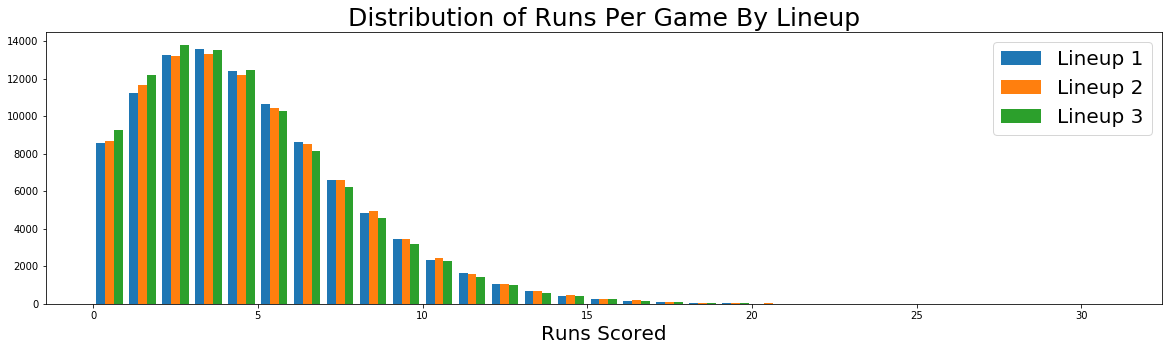

In [18]:
plt.figure(figsize = (20,5))
plt.xlabel('Runs Scored', fontsize = 20)
plt.title('Distribution of Runs Per Game By Lineup', fontsize = 25)
plt.hist([run_list_modern,run_list_traditional,run_list_bad], label = ['Lineup 1','Lineup 2','Lineup 3'],
         bins = np.max([run_list_modern,run_list_traditional,run_list_bad]))
plt.legend(loc='upper right', fontsize = 20)
plt.show();